In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

import urllib
import googlemaps
import io
import PIL.Image as Image

target_url = "https://www.aeonmall.com/mall/lists"
r = requests.get(target_url)
soup = BeautifulSoup(r.text, 'lxml')

In [52]:
def change_html_to_dataframe(html):
    return pd.read_html(str(html))[0]

df = pd.DataFrame()
for html in soup.find_all('table'):
    try:
        tmp_df = change_html_to_dataframe(html)
        if type(tmp_df.columns) == pd.core.indexes.multi.MultiIndex:
            tmp_df.columns = tmp_df.columns.droplevel()
        tmp_df = tmp_df.rename(columns={'Unnamed: 0': 'Unnamed: 0_level_1'})
        df = df.append(tmp_df)
    except:
        pass

In [54]:
df.head()

,Unnamed: 0_level_1,開店年,住所,電話番号,総賃貸面積(m²),駐車台数(台)
0,カテプリ,2016年,北海道札幌市厚別区厚別中央2条5丁目-7,011-890-1111,"約13,000㎡","約1,800台"
1,イオンモール旭川駅前,2015年,北海道旭川市宮下通7-2-5,0166-21-5544,"約29,000㎡",約900台
0,イオンモールつがる柏,1992年,青森県つがる市柏稲盛幾世41,0173-25-3450,"約40,000㎡","約2,600台"
1,イオンモール下田,1995年,青森県上北郡おいらせ町中野平40-1,0178-50-3200,"約59,000㎡","約4,000台"
2,イオンモール盛岡,2003年,岩手県盛岡市前潟4-7-1,019-605-3511,"約52,000㎡","約2,600台"


In [99]:
address = df['住所'].iloc[0]

In [112]:
key = pd.read_csv('key.txt').columns.values[0]
gmaps = googlemaps.Client(key=key)

geocode_result = gmaps.geocode(address)
geo_keys = geocode_result[0]['geometry']['location']
geocode_result

[{'address_components': [{'long_name': '7',
    'short_name': '7',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '5 Chome',
    'short_name': '5 Chome',
    'types': ['political', 'sublocality', 'sublocality_level_3']},
   {'long_name': 'Atsubetsuchuo 2 Jo',
    'short_name': 'Atsubetsuchuo 2 Jo',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': 'Atsubetsu Ward',
    'short_name': 'Atsubetsu Ward',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': 'Sapporo',
    'short_name': 'Sapporo',
    'types': ['locality', 'political']},
   {'long_name': 'Hokkaido',
    'short_name': 'Hokkaido',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'Japan',
    'short_name': 'JP',
    'types': ['country', 'political']},
   {'long_name': '004-0052',
    'short_name': '004-0052',
    'types': ['postal_code']}],
  'formatted_address': '5 Chome-7 Atsubetsuchuo 2 Jo, Atsube

In [145]:
def download_image(key, lat, lng, pixel, scale, maptype):
    """
    https://developers.google.com/maps/documentation/maps-static/start
    """    
    axis = str(lat) + "," + str(lng)
    base_url = 'https://maps.googleapis.com/maps/api/staticmap'
    query1 = f'?center={axis}&maptype={maptype}&size={pixel}&sensor=false'
    query2 = f'&zoom={scale}&markers=size:tiny&key={key}'
    url = base_url + query1 + query2
    data = urllib.request.urlopen(url).read()
    return data
    try:
        data = urllib.request.urlopen(url).read()
    except urllib.error.URLError as e:
        data = None
    return data

In [146]:
meta1 = {
    'pixel': '512x512',
    'scale': '18',
    'maptype': 'hybrid',}

meta2 = {
    'pixel': '512x512',
    'scale': '18',
    'maptype': 'satellite',}

In [150]:
data = download_image(key, **geo_keys, **meta1)
image = Image.open(io.BytesIO(data))

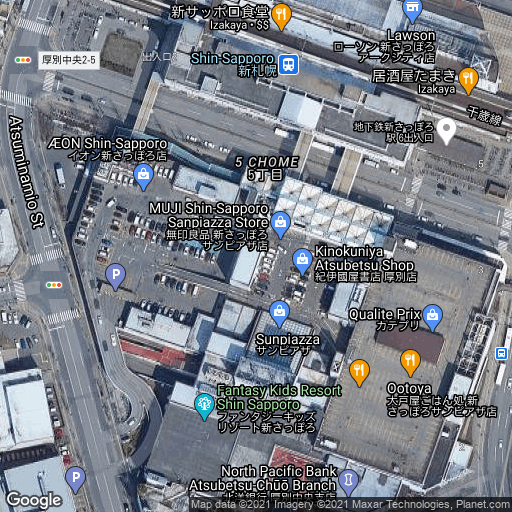

In [151]:
image

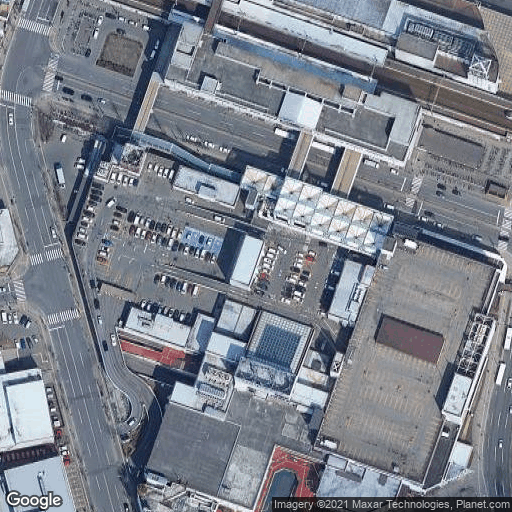

In [149]:
data = download_image(key, **geo_keys, **meta2)
image = Image.open(io.BytesIO(data))
image